<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
%matplotlib widget

import sxdm
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

from matplotlib.colors import LogNorm

mpl.rcParams["image.origin"] = "lower"
mpl.rcParams["font.family"] = "Liberation Sans"
mpl.rcParams["figure.dpi"] = 100

In [2]:
path_exp = "/data/id01/inhouse/edo/tutorial_data/"

name_sample = "ech_1_night1"
name_dset = "0010"

path_dset = (
    f"{path_exp}/{name_sample}/{name_sample}_{name_dset}/{name_sample}_{name_dset}.h5"
)
path_out = f"{path_exp}/{name_sample}_analysis"
path_qspace = f"{path_out}/qspace_shift_0.h5"

In [24]:
mask = np.zeros((60, 60)).astype("bool")
mask[:5, :5] = 1

In [25]:
qx, qy, qz = sxdm.utils.get_qspace_coords(path_qspace)
qspace_avg = sxdm.io.xsocs.get_qspace_avg(
    path_qspace, n_threads=48, real_space_mask=mask
)

  0%|          | 0/48 [00:00<?, ?it/s]

In [26]:
print(qspace_avg.max())

4874142.5


In [27]:
# idxs, m_idxs = sxdm.io.utils._get_chunk_indexes(path_qspace, "Data/qspace", n_threads=48, real_space_mask=None)

# idx_mask = {idx:val for idx, val in zip(np.indices(mask.flatten().shape)[0], mask.flatten())}

# idx_pair = idxs[10]

# idx_list = [x for x in range(*idxs[10], 1) if idx_mask[x] == True]

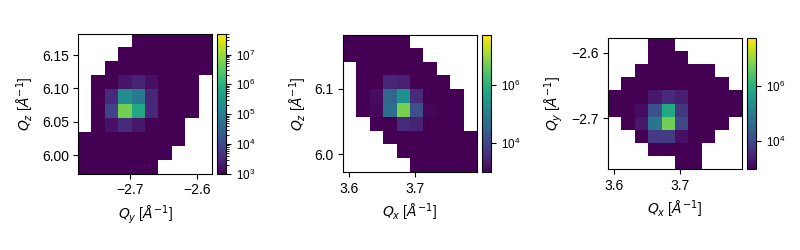

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(8, 2.5), layout="tight")

_qext = sxdm.utils.get_q_extents(qx, qy, qz)
for i in range(3):
    ax[i].imshow(
        qspace_avg.sum(i).T,
        extent=_qext[i],
        origin="lower",
        aspect="equal",
        norm=LogNorm(1e3, 5e7),
    )
    cbar = sxdm.plot.add_colorbar(ax[i], ax[i].get_images()[0], size="7%")

# labels etc.
ax[0].set_xlabel(r"$Q_y$ [$\AA^{-1}$]")
ax[2].set_ylabel(r"$Q_y$ [$\AA^{-1}$]")

for i in (1, 2):
    ax[i].set_xlabel(r"$Q_x$ [$\AA^{-1}$]")

for i in (0, 1):
    ax[i].set_ylabel(r"$Q_z$ [$\AA^{-1}$]")